<a href="https://colab.research.google.com/github/meghrajpardesi/Image_classification-cloths-/blob/master/Greendeck_assignment(Machine_learning).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
""""   All Imports are in this section"""
#  packages for general use
import os
import numpy as np
import pandas as pd
import urllib
from csv import reader
# --------------
#  packages for google drive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import to_categorical
from keras.preprocessing import image


import cv2
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from tqdm import tqdm

from google.colab.patches import cv2_imshow

In [0]:
# mounting the google

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)


#Dataset from the Zip File



> Link for dress_pattern.csv file
link: https://drive.google.com/file/d/1cHJ6QC8L4ztbYUP454Z_bbc06LxkGBOI/view?usp=sharing



> id = 1cHJ6QC8L4ztbYUP454Z_bbc06LxkGBOI


> name = dress_patterns.csv


> Link for dataset's Zip file link : https://drive.google.com/open?id=1oiYMvlxfcxSbbPqYW8ctifmBrJjvzb8Z


> ID of the file = 1oiYMvlxfcxSbbPqYW8ctifmBrJjvzb8Z


>  name = assignment.zip


In [33]:
download = drive.CreateFile({'id': '1oiYMvlxfcxSbbPqYW8ctifmBrJjvzb8Z'})
download.GetContentFile('assignment.zip')


ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py", line 2882, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-33-1aabc3a3bb9b>", line 2, in <module>
    download.GetContentFile('assignment.zip')
  File "/usr/local/lib/python3.6/dist-packages/pydrive/files.py", line 210, in GetContentFile
    self.FetchContent(mimetype, remove_bom)
  File "/usr/local/lib/python3.6/dist-packages/pydrive/files.py", line 43, in _decorated
    return decoratee(self, *args, **kwargs)
  File "/usr/local/lib/python3.6/dist-packages/pydrive/files.py", line 255, in FetchContent
    self.content = io.BytesIO(self._DownloadFromUrl(download_url))
  File "/usr/local/lib/python3.6/dist-packages/pydrive/auth.py", line 75, in _decorated
    return decoratee(self, *args, **kwargs)
  File "/usr/local/lib/python3.6/dist-packages/pydrive/files.py", line 503, in _DownloadFromUrl
    resp, content = self.http.request(ur

KeyboardInterrupt: ignored

In [0]:
# unzipping the downloaded zip file
!unzip assignment.zip

# Making dataset using url from data_patterns.csv

In [0]:
download = drive.CreateFile({'id': '1cHJ6QC8L4ztbYUP454Z_bbc06LxkGBOI'})
download.GetContentFile('dress_patterns.csv')

In [0]:
mkdir dataset

In [0]:

csv_filename = 'dress_patterns.csv' # csv file contains urls
dst_dir = '/content/dataset/' # destination directory


def getImages(csv_file,loc):
    img_counts = 0
    fail_counts = 0
    with tqdm(open(csv_file, 'r')) as csv_file:
        for line in reader(csv_file):
            # line[1] is dedicated dir name
            # line[0] is id as name 
            url = line[3]
            name = url.rsplit('/')[-1].split('.')[0] +'.png'
            filename = loc + name
            
            try :
                urllib.request.urlretrieve(url, filename)
                img_counts += 1
            except  Exception as e:
                fail_counts += 1
                print(str(e))
    print('\n Done')
    print(f"Images downloaded : {img_counts}")
    print(f"Images failed to download {fail_counts}")
                         
# getImages(csv_filename,dst_dir)


# Preparing data

In [0]:
# this will also going to used in model
IMG_WIDTH = 50
IMG_HEIGHT = 75
IMG_CHENNEL = 1
IMG_DIR = '/content/assignment'
# IMG_DIR = '/content/dataset'

# list of images data for training 


# function to create a train
def makeImageData(file,img_data_dir,IMG_WIDTH = 50,IMG_HEIGHT = 50,IMG_CHENNEL = 1):
    df = pd.read_csv(file)
    train_image = []
    for i in tqdm(range(0,df.shape[0])):
        url = df['image_url'][i]
        name = url.rsplit('/')[-1].split('.')[0]
        img_path = img_data_dir +'/'+name

        img = image.load_img(img_path+'.png', target_size=(IMG_WIDTH,IMG_HEIGHT,IMG_CHENNEL),color_mode = "grayscale")
        img = image.img_to_array(img)
        img = img/255
        train_image.append(img)

    X = np.array(train_image)
    np.save('X_images.npy',X)
    return X


# X is list containing all processed images 
X = makeImageData(csv_filename,IMG_DIR,IMG_WIDTH,IMG_HEIGHT,IMG_CHENNEL)


In [0]:
# representing string as numenral for better understanding
def createLabelList(file,label_col):
    catDict = {}
    y =[]
    df = pd.read_csv(file)
    y_temp = df[label_col].unique()

    for i,cat in enumerate(y_temp):
        catDict[cat] = i

    temp = df[label_col].values

    for name in temp:
        y.append(catDict[name])

    y = to_categorical(y)
   
    np.save('y_labels.npy',y)

    return y,catDict

y,category_dict = createLabelList(csv_filename,'category')


In [0]:

def splitdataset(X,y,split_size =0.2):
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=split_size)
    return  X_train, X_test, y_train, y_test

split_size =0.2 # ratio in which data devides
# to Create train and test dataset
X_train, X_test, y_train, y_test = splitdataset(X,y,split_size)


#  To further divide X-train data in train and validation dataset.
X_train, X_val, y_train, y_val = splitdataset(X_train,y_train ,split_size)


# Creating Model

In [0]:

def buildModel():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', padding='same', name='conv_1', 
                    input_shape=(IMG_WIDTH, IMG_HEIGHT, IMG_CHENNEL)))
    model.add(MaxPooling2D((2, 2), name='maxpool_1'))
    model.add(Conv2D(64, (3, 3), activation='relu', padding='same', name='conv_2'))
    model.add(MaxPooling2D((2, 2), name='maxpool_2'))
    model.add(Conv2D(128, (3, 3), activation='relu', padding='same', name='conv_3'))
    model.add(MaxPooling2D((2, 2), name='maxpool_3'))
    model.add(Conv2D(128, (3, 3), activation='relu', padding='same', name='conv_4'))
    model.add(MaxPooling2D((2, 2), name='maxpool_4'))
    model.add(Flatten())
    model.add(Dropout(0.5))
    # model.add(Dense(512, activation='relu', name='dense_1'))
    model.add(Dense(128, activation='relu', name='dense_2'))
    model.add(Dense(17, activation='softmax', name='output'))

    model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])
    return model

model = buildModel()

In [0]:
#  training the model
model.fit(X_train, y_train, epochs=100, validation_data=(X_val, y_val))


In [0]:
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")

In [0]:
model.evaluate(x=X_test, y=y_test, batch_size=None, verbose=1,)

# Predicting finction

In [43]:
def predictImage(img_path):
    # category_dict to category list
    categories = list(category_dict.keys()) 
    IMG_WIDTH = 50
    IMG_HEIGHT = 75
    IMG_CHENNEL = 1
    IMG = image.load_img(img_path, target_size=(IMG_WIDTH,IMG_HEIGHT,IMG_CHENNEL),color_mode = "grayscale")
    IMG = image.img_to_array(IMG)
    IMG = IMG/255
    x = np.expand_dims(IMG, axis=0)
    result =int(model.predict_classes(x))

    result_category = categories[result]
    return result_category


img = '/content/strips2.png'
category = predictImage(img)
print(category)


stripes


# Similarity Finction 


> This function uses the predictImage function and return the similar images 



query Image category is stripes


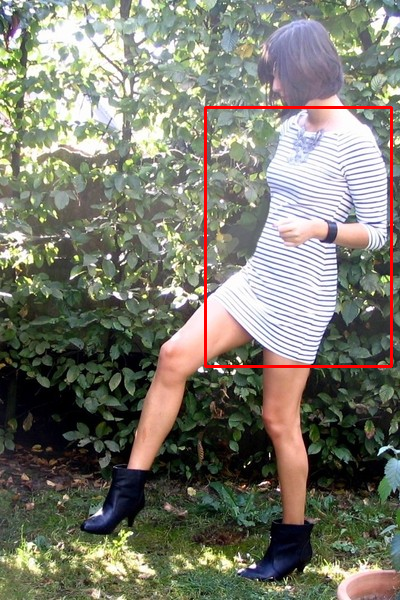

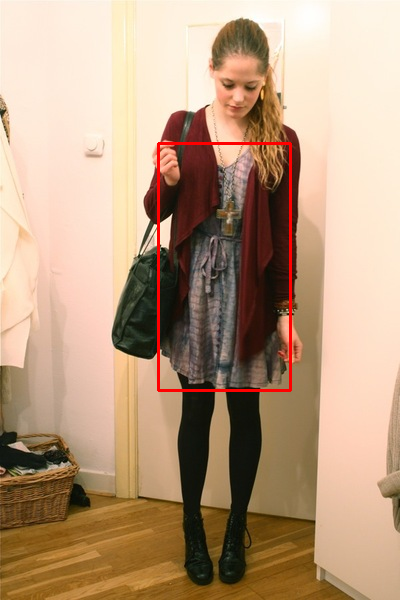

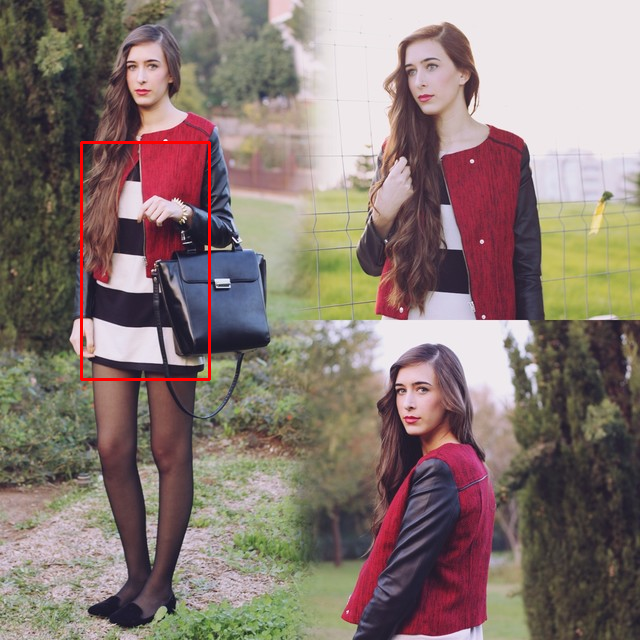

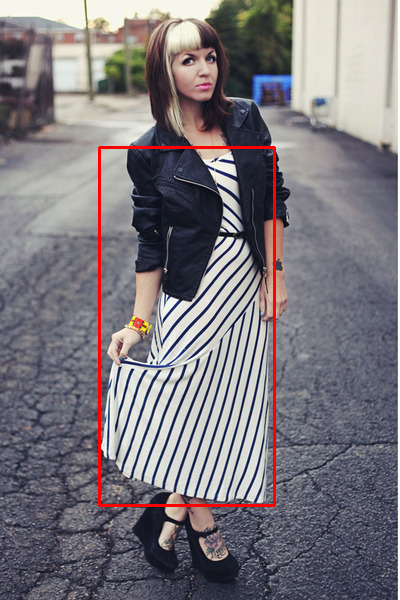

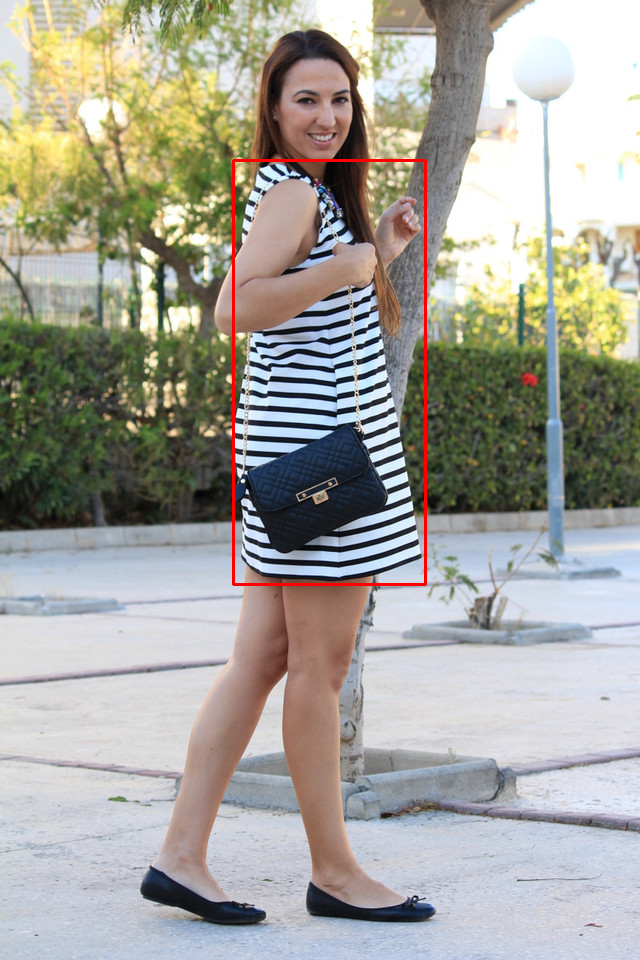

In [108]:
csv_file = 'dress_patterns.csv' # csv file contains urls
% matplotlib inline
def showSimilarImage(img_path,n_sim = 4):
 
    result_category = predictImage(img_path)

    print(f"query Image category is {result_category}")
    img = cv2.imread(img_path, cv2.IMREAD_UNCHANGED)
    cv2_imshow(img) # to Display query image 

    df =pd.read_csv(csv_file)
    df1 =df[ df['category'].str.contains(result_category).to_list() ]
    imgs = df1['image_url'].sample(n_sim).to_list()
    # To display all the similar images
    for i in imgs:
        name = i.rsplit('/')[-1].split('.')[0]+'.png' 
        loc = "/content/assignment/"
        imgName = loc + name
        # print(filename)
        img = cv2.imread(imgName, cv2.IMREAD_UNCHANGED)
        cv2_imshow(img) 

showSimilarImage('/content/plain2.png')